In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [ ]:
# read in the EPIC data that created by using 01_select_triggers_EPIC.py
df_epic = pd.read_hdf('../data/e2trigs.h5')

##### Only used for the raw data downloaded from the server
# convert the timestamp to datetime
df_epic['datetime'] = pd.to_datetime(df_epic['time'],unit='s')

# set index
df_epic = df_epic.set_index('datetime')

df_epic.to_hdf('./e2trigs_20180101_20190101.h5', 'e2trigs')
#####

## Plot daily triggers

In [4]:
daily_count = df_epic['sta'].resample('D').count()

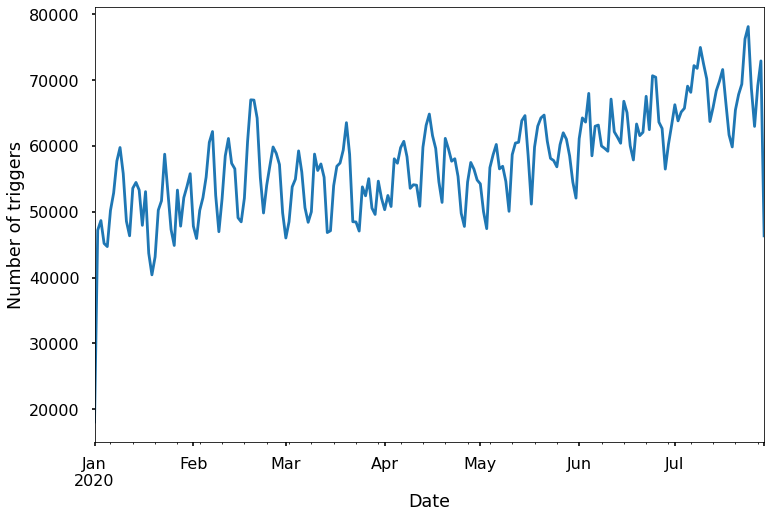

In [5]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
daily_count.plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Number of triggers')
plt.show()

In [9]:
sta_daily_count = df_epic.groupby(df_epic.index.date)['sta'].nunique()

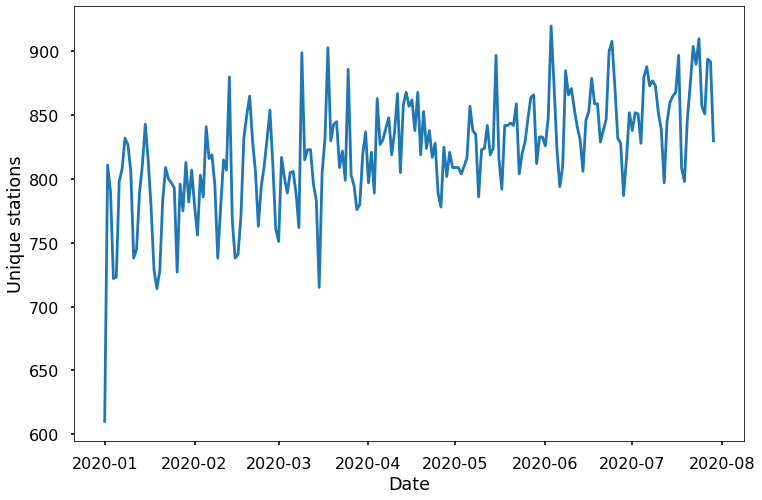

In [10]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
sta_daily_count.plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Unique stations')
plt.show()